# Introduction

In this project we will analysis the wine dataset from sklearn and try to predict the different classes. 

The wine dataset is a classic and very easy multi-class classification dataset. The total number of samples is 178, with 13 predictors, and 3 different classes. Below I will list the predictors:

- Alcohol
- Malic Acid
- Ash
- Alcalinity of Ash
- Magnesium
- Total Phenols
- Flavanoids
- Nonflavanoid Phenols
- Proanthocyanins
- Color Intensity
- Hue
- od280/od315 of Diluted Wines
- Proline

In [1]:
import pandas as pd 
import numpy as np
import sklearn.datasets
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_data = sklearn.datasets.load_wine(as_frame=True, return_X_y=True)

In [3]:
wine_data = raw_data[0].merge(raw_data[1], how='inner', left_index=True, right_index=True)

In [4]:
wine_data

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  
0                            3.92   1065.0       0  
1                            3.40   1050.0       0  
2                            3.17   1185.0       0  
3                            3.45   1480.0       0  
4                            2.93    735.0       0  
..                            ...      ...     ...  
173                          1.74    740.0       2  
174                          1.56    750.0       2  
175                          1.56    835.0       2  
176                          1.62    840.0       2  
177                          1.60    560.0       2  

[178 rows x 14 columns]

In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

# Exploratory Analysis

In [14]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(wine_data, hue='target', height=6);
plt.show()

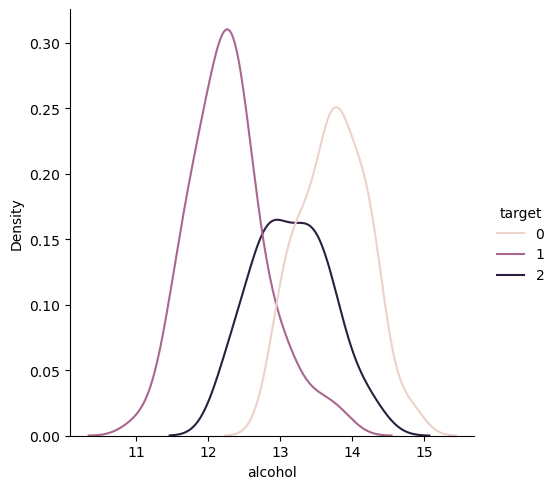

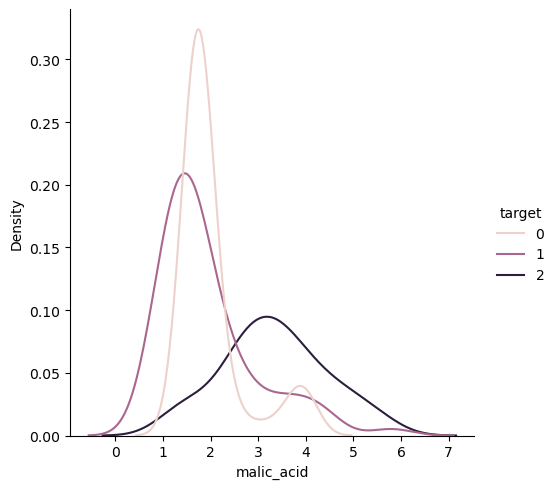

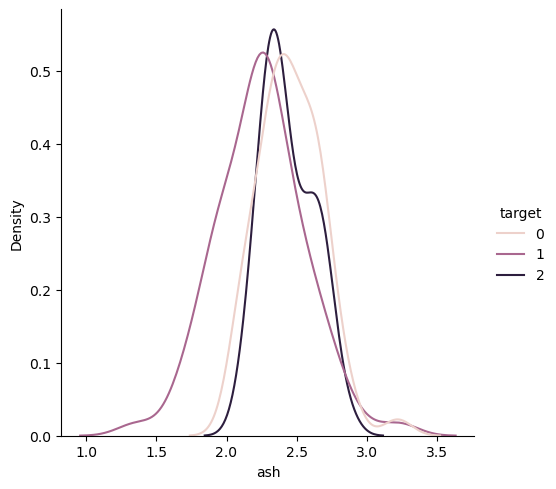

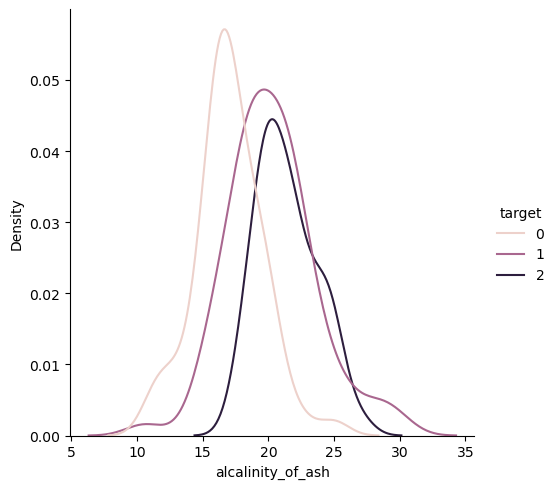

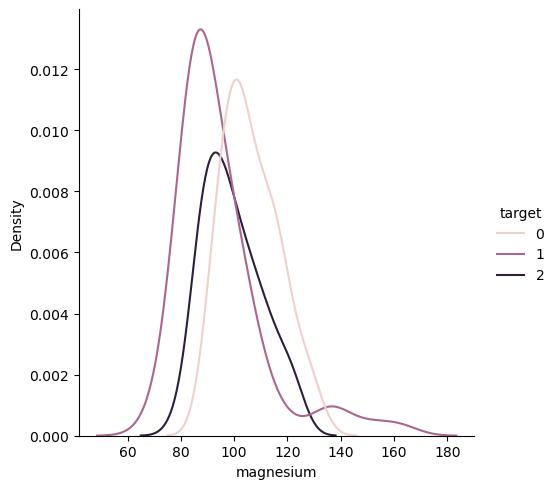

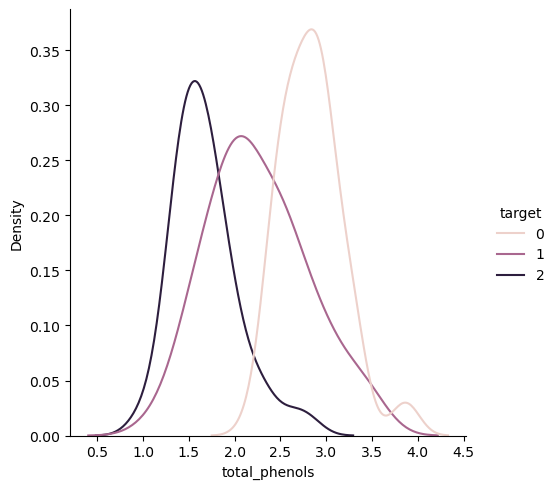

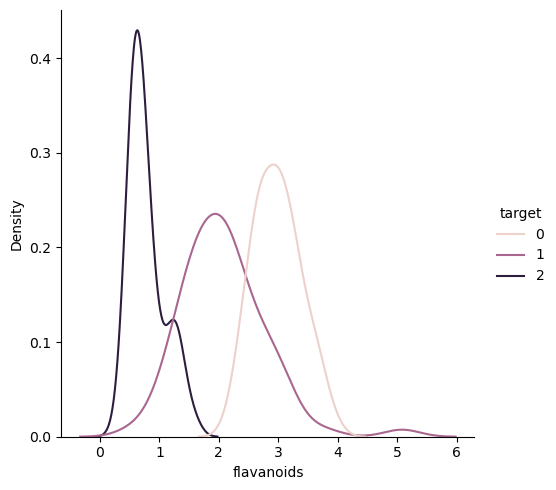

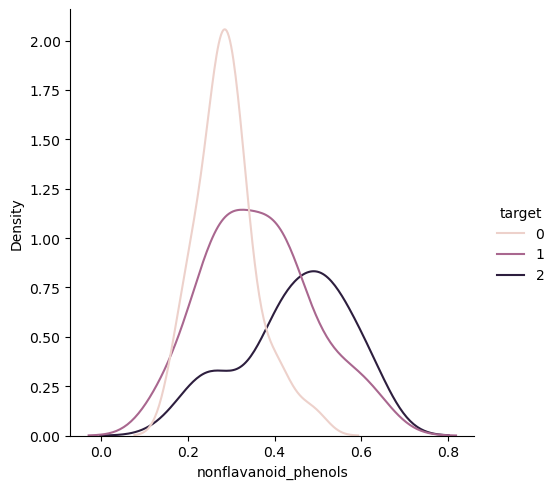

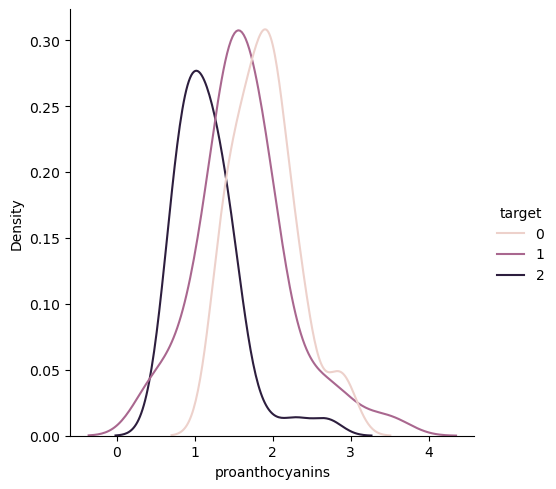

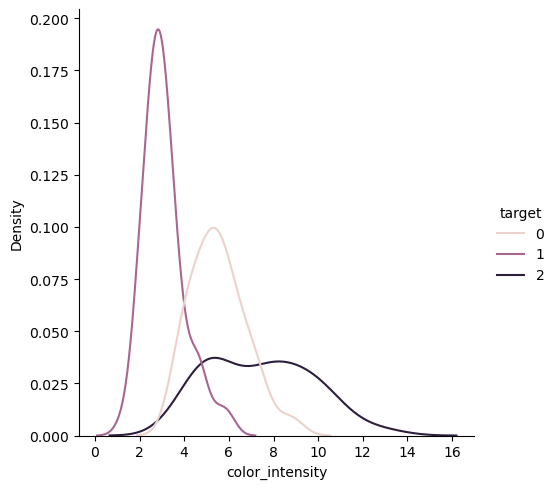

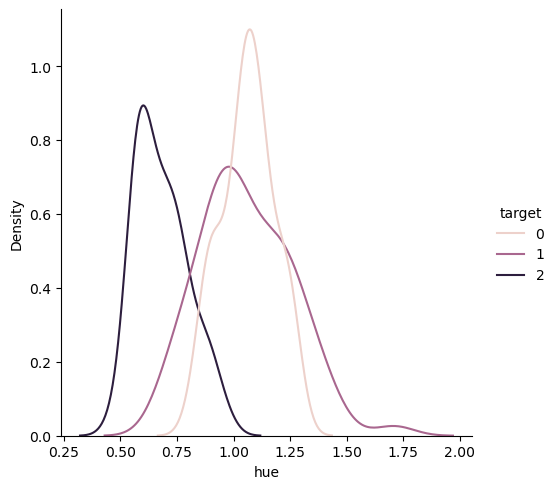

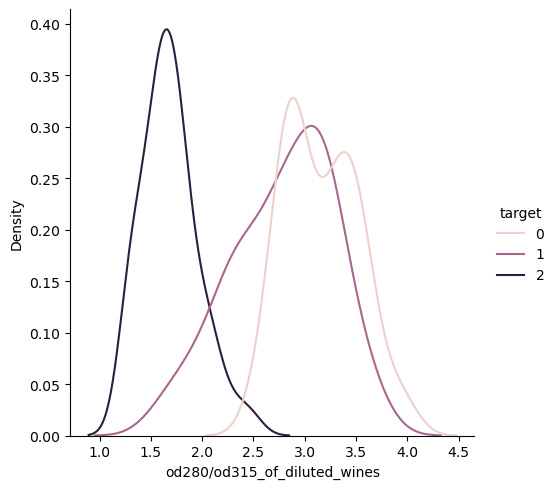

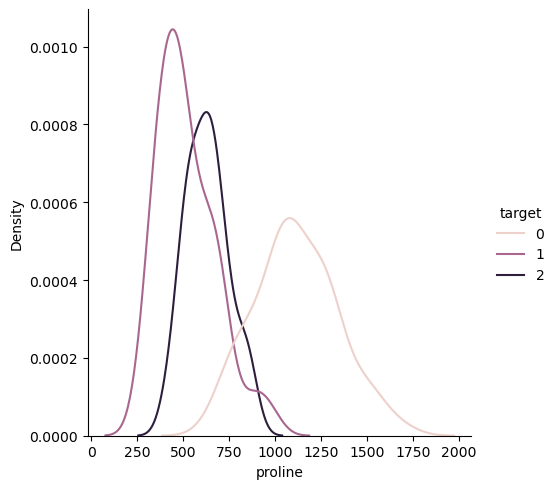

In [6]:
for feature in wine_data.columns.drop('target'):
    sns.displot(wine_data, x=feature, hue='target', kind='kde');

# Model Building

In this section we will try several models and see which performs the best. We will use the following models. 

- Logistic Regression
- KNearestNeighbors
- Random Forest



In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [8]:
# Make a dataframe to save our results from each model
model_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Model Arguments'])

In [9]:
# Split the data
predictors = wine_data.drop(columns='target')
target = wine_data.drop(columns=predictors.columns)
X_train, X_test, y_train, y_test = train_test_split(predictors, target, train_size=0.70, random_state=1)

## Normalize Data

Normalizing the data ensures that the range of values for each features is in the range 0-1. This helps the performance of the model is better. 

In [10]:
X_train_scaled = MinMaxScaler().fit_transform(X_train)
X_test_scaled = MinMaxScaler().fit_transform(X_test)

In [11]:
# Define the multinomial logistic regression model
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Fit the model on the training set
y_train_array = np.ravel(y_train)
lr.fit(X_train_scaled, y_train_array)

# Predict the class label
predictions = lr.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, predictions)

# Report the model performance
print('Accuracy: {}'.format(accuracy))

# Add our model, accuracy, and model arguments to model_results_df
model_results.loc[len(model_results)] = ['Logistic Regression', accuracy, '{multi_class: multinomial, solver: lbfgs}']


Accuracy: 0.9814814814814815


In [12]:
model_results

Model  Accuracy                            Model Arguments
0  Logistic Regression  0.981481  {multi_class: multinomial, solver: lbfgs}

In this project we will analysis the wine dataset from Sklearn and try to make predictions on it. We will follow the framework below:

1. Data Preparation. 
    - Exploratory data analysis, learning about the data. 
        - What are the feature variables and target variables.
        - What kind of variables do we have. (numeric, time series, etc)
        - Are their missing values. 
        - Are their outliers. 
    - Data preprocessing, preparing data to be modeled. 
        - Feature imputation. Filling missing values.
        - Feature encoding. Machine learning requires all values to be numerical. 
        - Label encoder. Turn labels into distinct numerical values. 
        - Feature normalization. Machine learning performs much better when all numeric predictions are on the same scale (preferably 0-1 scale)
        - Feature engineering. Transform data into (potentially) more meaningful representation by adding in domain knowledge. 
        - Feature selection. Selecting the most valuable features of your dataset to model. This potentially reduces over-fitting and training time. 
        - Dealing with imbalances. If the different classes are not close to being evenly divided, the model might pick up on this and it potentially won't use the predictors to make predictions. 
        - Data splitting. training, validation, and test set. (70, 15, 15 split)
        
2. Training Model 
    - Choosing an algorithm
        - Supervised algorithms: Linear Regression, Logistic Regression, KNN, SVMs, Decision Tree, Random Forest, AdaBoost/Gradient Boosting Machine
        - Unsupervised algorithms: K-Means Clustering, Hierarchical Clustering, Spectral Clustering, Boosting, Gaussian Mixtures, Boosting
    - Hyperparameter tuning. 
        - Run a bunch of experiments with different settings and see which works best. 
        
3. Analysis/Evaluation
    - Evaluation metrics.
        - Classification: Accuracy, precision, recall, F1, confusion matrix, mean average precision.
        - Regression: MSE, MAE, R^2
        
4. Deploying Model
    - Put the model into production and see how it performs. 
    - Tools:
        - Tensorflow, Pytorch, Google AI Platform, Sagemaker
    - MLOps: Where software engineering meets machine learning, essentially all the technology required around a machine learning model to have it work through production. 
    
5. Retain Model
    - See how the model performs after serving based on various evaluation metrics and revisit the above steps as required. 
    - You'll also find the model's predictions start to 'age' (not in a good way) or drift, as in when data sources change or upgrade. This is when you should retain it. 
        